In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
% matplotlib inline

In [4]:
# Defined constants:
mass = .1409 #(+/- .001) kg
rod_l = 9.381e-2 #(+/- .001) m
handle_d = 1.261e-2 #(+/- .001) m
cue_r = .5*5.379e-2 #(+/- .001) m

# Magnetic Torque Experiment

### Abstract

The aim of this experiment is to measure the magnetic moment of a small magnet attached to a cue ball. The methods used in this experiment include balancing magnetic toque with the gravitational torque on the ball, measuring the harmonic oscillation of the ball treated as a spherical pendulum, and measuring the magnetic field produced by way of a Hall Effect probe. The different ways to measure the magnetic moment are compared to qualitatively decide which method is the most reliable.

### Theoretical Overview

This experiment relies on the relatively uniform magnetic field produced by a Helmholtz Coil with a steady, controllable current. Studying different ways that the magnetic dipole embedded in the cue ball interacts with the field yields indirect measurements for the magnetic moment of the dipole. This experiment first deals with balancing the magnetic torque originating from the Helmholtz coil with the gravitational force from the Earth. The second experiment deals with the harmonic oscillation of the cue ball, treating it as a spherical pendulum and measuring the period of its oscillation in a magnetic field. The third method used measures the voltage induced in a Hall Effect probe as a function of distance from the probe to calculate the magnetic moment.

### Balancing Magnetic Torque with Gravitational Torque; Harmonic Oscillation of a Spherical Pendulum

#### Experimental Setup and Procedure

The first portion of this experiment involves balancing the magnetic torque with the gravitational torque felt by the magnetic dipole attached to the cue ball. The ball is placed on the air bearing such that the ball lies where the Helmholtz coil produces a uniform magnetic field. A rod with a weight attached to it is embedded in the cue ball. The magnetic field from the coils is directed upward to counteract the torque due to gravity on the rod. Since the magnetic moment is parallel to the rod, an upward magnetic field will produce an upward torque on the rod. The length of rod between the weight and the center of the cue ball is defined as the lever arm since the torque from gravity is applied there. The torques due to magnetc field and gravity are balanced several times for different lever arms. The balanced toques can be written as $\mu B$sin$\theta$ = $rmg$sin$\theta$. Since the angle $\theta$ is the same for both torques, the sin$\theta$ terms cancel, and the expression simplifies to $r$ = $\frac{\mu}{mg}B$. Plotting the linear relationship and applying a fit to the data will yield an experimental result for $\mu$, the magnetic moment. $^{[1]}$

The second portion of this experiment involves a similar setup to the first with a rod embedded in the cue ball in an upward magnetic field produced by the Helmholtz coil. The ball is then displaced some angle from the upward magnetic field and given a rotation. The ball then precesses about the magnetic field axis in the $+z$ direction. A measurement is taken of twenty periods which is then divided by twenty to yield the period of one oscillation. This is done for currents in the coil up to 4 Amperes. The equation $T^2$ = $\frac{4\pi^2I}{\mu B}$, where $I$ is the moment of inertia of the ball, can be derived$^{[1]}$. $T^2$ can be plotted as a function of $\frac{1}{B}$ linearly. The coefficient of this linear fit is then $\frac{4\pi^2I}{\mu}$ which can be used to solve for $\mu$.

### Experimental Data:

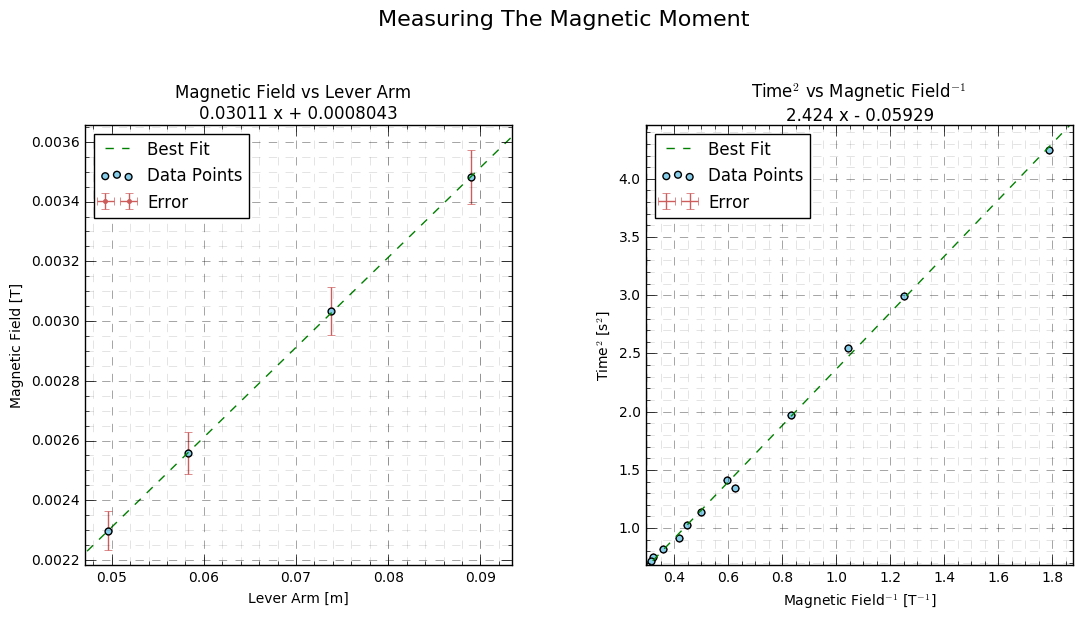

In [36]:
# r = lever arm from center of ball to weight attached to rod
r = np.array([4.961,5.831,8.901, 7.381]) * 1e-2

# amp = current measurement for each lever arm
amp = [1.69,1.88,2.56, 2.23]

# amp2 = defined currents for period measurements of pendulum
amp2 = 1./np.array([.7,1.0,1.2,1.5,2.0,2.1,2.5,2.8,3.0,3.5,3.9,4.0])

# sec = measurement of period of harmonic pendulum
sec = np.array([2.061,1.73,1.595,1.404,1.161,1.19,1.065,1.013,.958,.906,.865,.8485])**2
B = 1.36e-3 #conversion constant amps to teslas

# tesla, tesla2 = current measurements converted into teslas
tesla = [1.69*B,1.88*B,2.56*B, 2.23*B]
tesla2 = amp2*((4.*np.pi**2*4.313e-5)/B)

# linear fits for data
amp_fit = np.polyfit(r,amp,1)
amp_fit = np.poly1d(amp_fit)
amp_fit_range = np.linspace(0, 10, 100)
amp2_fit = np.polyfit(amp2,sec,1)
amp2_fit = np.poly1d(amp2_fit)
amp2_fit_range = np.linspace(0, 10, 100)
tesla_fit = np.polyfit(r,tesla,1)
tesla_fit = np.poly1d(tesla_fit)
tesla_fit_range = np.linspace(0, 10, 100)
tesla2_fit = np.polyfit(tesla2,sec,1)
tesla2_fit = np.poly1d(tesla2_fit)
tesla2_fit_range = np.linspace(0, 10, 100)

# errors associated with magnetic field 
tesla_err = [amp[i]*B*(.01 / amp[i] + .03e-3 / B) for i, val in enumerate(amp)]
tesla2_err = [amp2[i]*B*(.01 / amp2[i] + .03e-3 / B) for i, val in enumerate(amp2)]

# GRAPH FORMATTING
wspace = 0.25
hspace = 0.25
height_ratios = [.25,6]
width_ratios = [6,.25,6]
fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)
fig.suptitle('Measuring The Magnetic Moment', fontsize=16)
ax = fig.add_subplot(gs[1, 0])
ax.scatter(r,tesla, marker='o', s=24, c = 'skyblue', label='Data Points')
ax.plot(tesla_fit_range, tesla_fit(tesla_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(r, tesla, xerr=0.01 * 1e-2, yerr=tesla_err, fmt='.', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Magnetic Field vs Lever Arm {}'.format(tesla_fit),
            'xlabel': 'Lever Arm [m]',
            'ylabel': 'Magnetic Field [T]',
            'xlim': (min(r) - min(r)*.05, max(r) + max(r)*.05),
            'ylim': (min(tesla) - min(tesla)*.05, max(tesla) + max(tesla)*.05)})
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.legend(loc='best')
ax = fig.add_subplot(gs[1, 2])
ax.scatter(tesla2, sec, marker='o', s=24, c = 'skyblue', label='Data Points')
ax.plot(tesla2_fit_range, tesla2_fit(tesla2_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(tesla2, sec, xerr=tesla2_err, yerr=.02**2, fmt=',', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Time$^{2}$ vs Magnetic Field$^{-1}$' + '{}'.format(tesla2_fit),
            'xlabel': 'Magnetic Field$^{-1}$ [T$^{-1}$]',
            'ylabel': 'Time$^{2}$ [s$^{2}$]',
            'xlim': (min(tesla2) - min(tesla2)*.05, max(tesla2) + max(tesla2)*.05),
            'ylim': (min(sec)*.95, max(sec)*1.05)})
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.legend(loc='best')
plt.show()

In [11]:
# mu = coeff * mass * g
print 'Magnetic moment =', tesla_fit[1] * mass * 9.81

Magnetic moment = 0.0416214446805


In [17]:
# moment of inertia of sphere = 2/5 * m * R**2
moment = 2./5.*mass*cue_r**2
# mu = 4*pi^2*I / coeff
print 'Magnetic moment =', 4.*np.pi**2*moment/tesla2_fit[1]

Magnetic moment = 0.00066395592555


### Discussion and Conclusion:

# Hall Effect

Power Supply: 4.5 Volts, 2.05 Amperes

Multimeter: 1.16 $\pm$ .02 Volts, 1.92 $\pm$ .01 Amperes

In [19]:
coil_rad = (46.68-4.07) / 2. * 1e-3
B_field = 15.*1.92*.9e-6 / (coil_rad)
print B_field
voltage = 1.16 / 10
voltage_err = .02 / 10
proportionality = B_field / voltage
print proportionality

0.00121661581788
0.0104880673955


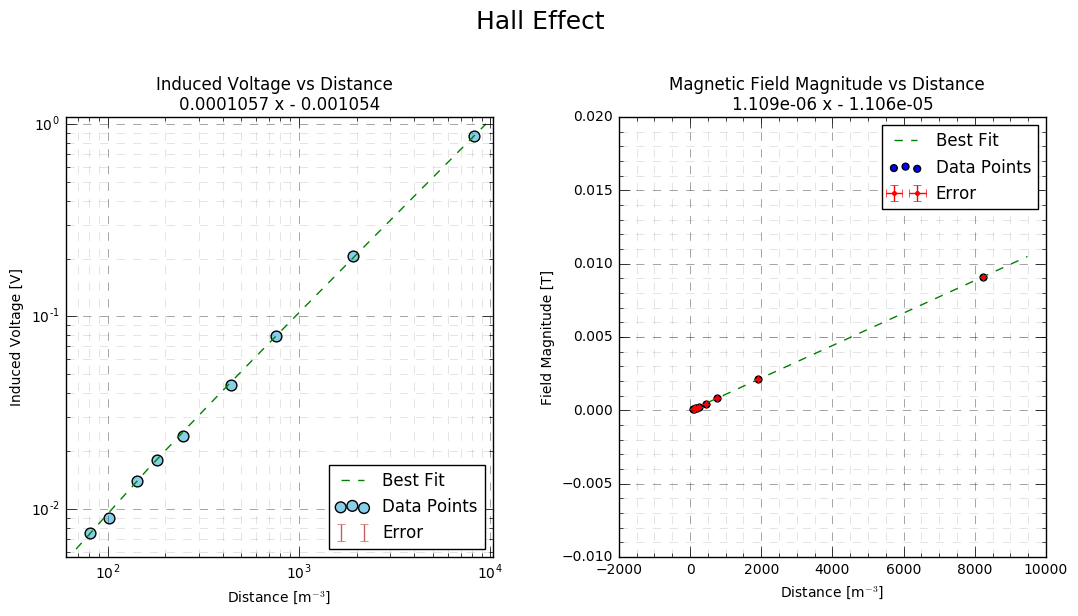

In [38]:
# distance = distance between probe and magnet
distance = (np.array([0,3.1,8.2,14.2,18.2,11.0,12.7,16.5,6.0]) + 4.951) * 1e-2
distance = 1./(distance**3)

# voltage = voltage measured by hall effect probe
hall_voltage = np.array([869.0, 206.0, 44.0, 14.0, 7.5, 24.0, 18.0, 9.0, 79.0]) * 1e-3
hall_voltage_err = np.array([.002, .002, .002, .002, .0009, .001, .002, .001, .001]) * 1e-3

# B-field calulated by multiplying voltage by proportionality constant
hall_tesla = hall_voltage * proportionality
hall_tesla_err = hall_voltage_err * proportionality

# fitting data
voltage_fit = np.polyfit(distance,hall_voltage,1)
voltage_fit = np.poly1d(voltage_fit)
voltage_fit_range = np.linspace(min(distance) - min(distance)*.15, max(distance) + max(distance)*.15, 100)
hall_tesla_fit = np.polyfit(distance,hall_tesla,1)
hall_tesla_fit = np.poly1d(hall_tesla_fit)
hall_tesla_fit_range = np.linspace(min(distance) - min(distance)*.15, max(distance) + max(distance)*.15, 100)

# Plot formatting
height_ratios = [.15,6]
width_ratios = [6,.15,6]
wspace = 0.25
hspace = 0.25
fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)
fig.suptitle('Hall Effect', fontsize=18)
ax = fig.add_subplot(gs[1, 0])
ax.scatter(distance, hall_voltage, marker='o', s=60, c = 'skyblue', label='Data Points')
ax.plot(voltage_fit_range, voltage_fit(voltage_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(distance, hall_voltage, yerr=hall_voltage_err, fmt=',', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Induced Voltage vs Distance {}'.format(voltage_fit),
            'xlabel': 'Distance [m$^{-3}$]',
            'ylabel': 'Induced Voltage [V]'})
ax.set_xlim(min(distance) - min(distance)*.25, max(distance) + max(distance)*.25)
ax.set_ylim(min(hall_voltage) - min(hall_voltage)*.25, max(hall_voltage) + max(hall_voltage)*.25)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc=4)
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax = fig.add_subplot(gs[1, 2])
ax.scatter(distance,hall_tesla, marker='o', s=24, c = 'blue', label='Data Points')
ax.plot(hall_tesla_fit_range, hall_tesla_fit(hall_tesla_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(distance, hall_tesla, xerr=0.01*proportionality, yerr=hall_tesla_err, fmt='.', c='red', label='Error')
ax.update({'title': 'Magnetic Field Magnitude vs Distance {}'.format(hall_tesla_fit),
            'xlabel': 'Distance [m$^{-3}$]',
            'ylabel': 'Field Magnitude [T]'})
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.legend(loc='best')

In [37]:
mu_0 = np.pi*4e-7 # permeability of free space
print 'Magnetic moment =', np.pi*2*hall_tesla_fit[1]/mu_0

Magnetic moment = 5.5428839228


## Experiment 2: Electron Spin Resonance

shit_finder 1.60723275582e-21
mu_s: 1.00991060182e-23 
g: 2.18046603002
mu_s error: 0.0889698100325 
g error: 0.0889698100325


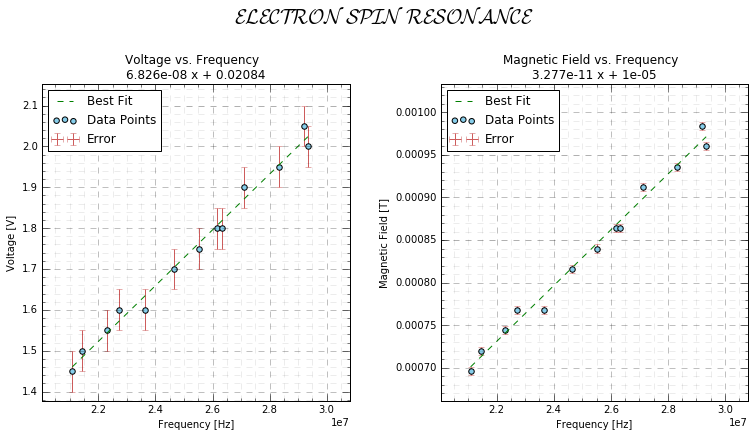

In [39]:
h = 6.626e-34
g = 2.00232
mu_s = 9.274e-24

freq = np.array([21.09, 21.44, 22.29, 22.72, 23.65, 24.64, 25.51, 26.17, 26.33, 27.11, 28.33, 29.21, 29.34])*1e6
voltage  = np.array([14.5, 15.0, 15.5, 16.0, 16.0, 17.0, 17.5, 18.0, 18.0, 19.0, 19.5, 20.5, 20.0]) / 2. / 5.
B  = (np.array([14.5, 15.0, 15.5, 16.0, 16.0, 17.0, 17.5, 18.0, 18.0, 19.0, 19.5, 20.5, 20.0]) / 2.)*(.48e-3) / 5.
freq_err = .01*1e6
voltage_err  = .5 / 2. / 5.
B_err = voltage_err * .48e-3 / 5.

voltage_fit = np.polyfit(freq,voltage,1)
voltage_fit = np.poly1d(voltage_fit)
voltage_fit_range = np.linspace(min(freq), max(freq), 100)
B_fit = np.polyfit(freq,B,1)
B_fit = np.poly1d(B_fit)
B_fit_range = np.linspace(min(freq), max(freq), 100)

height_ratios = [.15, 6]
width_ratios = [6, .15, 6]
wspace = 0.25
hspace = 0.25
fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)

fig.suptitle('$\mathcal{ELECTRON}$ $\mathcal{SPIN}$ $\mathcal{RESONANCE}$', fontsize=20)

ax = fig.add_subplot(gs[1, 0])
ax.scatter(freq, voltage, marker='.', s=120, c = 'skyblue', label='Data Points')
ax.plot(voltage_fit_range, voltage_fit(voltage_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(freq, voltage, xerr=freq_err, yerr=voltage_err, fmt=',', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Voltage vs. Frequency {}'.format(voltage_fit),
           'xlabel': 'Frequency [Hz]',
           'ylabel': 'Voltage [V]',
           'xlim': (min(freq) - min(freq)*.05, max(freq) + max(freq)*.05),
           'ylim': (min(voltage) - min(voltage)*.05, max(voltage) + max(voltage)*.05)})

ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.legend(loc='best')

ax = fig.add_subplot(gs[1, 2])
ax.scatter(freq, B, marker='.', s=120, c = 'skyblue', label='Data Points')
ax.plot(B_fit_range, B_fit(B_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(freq, B, xerr=freq_err, yerr=B_err, fmt=',', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Magnetic Field vs. Frequency {}'.format(B_fit),
           'xlabel': 'Frequency [Hz]',
           'ylabel': 'Magnetic Field [T]',
           'xlim': (min(freq) - min(freq)*.05, max(freq) + max(freq)*.05),
           'ylim': (min(B) - min(B)*.05, max(B) + max(B)*.05)})

ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.legend(loc='best')

mu_s_calculated = h/(g*B_fit[1])
g_calculated = h/(mu_s*B_fit[1])
mu_s_error = abs(mu_s - mu_s_calculated) / mu_s
g_error = abs(g - g_calculated) / g

shit_finder = (np.average(B)/np.average(freq))*(np.average(B_err / B) + np.average(freq_err / freq))

print  "shit_finder", h/(shit_finder*g)

print "mu_s:", mu_s_calculated, "\ng:", g_calculated
print "mu_s error:", mu_s_error, "\ng error:", g_error

## References:

[1]: Heindl, R. "Magnetic Force and Magnetic Torque"